In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras import utils

In [2]:
# loading pre processed data
df = pd.read_csv('/content/drive/MyDrive/data_preprocessed.csv')
df.head()

,type,text,word_count
0,BILL,641356219cbc 422068f04236 6099f4533cc2 6413562...,254
1,BILL,6ca2dd348663 d38820625542 25c57acdf805 2a49f47...,281
2,BILL,019e6932b862 d7b4f3b093bf b9699ce57810 7f3b857...,252
3,BILL,03ea9b9cef7d b136f6349cf3 036087ac04f9 999d400...,434
4,BILL,586242498a88 9de56cbee28f 7c81ee28575a c5d48b6...,385


In [3]:
df.shape

(50262, 3)

In [4]:
#Spliting into train test
X = df['text']
y = df['type']

raw_doc_train, raw_doc_test, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=100)

In [5]:
#Tokenizing the data
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(raw_doc_train)

X_train = tokenize.texts_to_sequences(raw_doc_train)
X_test = tokenize.texts_to_sequences(raw_doc_test)

vocab_size = len(tokenize.word_index) + 1  

print(raw_doc_train[0])
print(X_train[0])

641356219cbc 422068f04236 6099f4533cc2 641356219cbc d19b1c129f40 6ca2dd348663 d38820625542 9e0c01b8b857 a38ce021437b afb1e3806fc1 de9738ee8b24 fb2cd24a447a 8f75273e5510 f95d0bea231b 8c83387cf5c5 790ab7bde7fb 74dbf7440bf2 6df68667f16b 6365c4563bd1 4ad52689d690 a024d1e04168 e504ee0aaf6d 25c57acdf805 eca16ee06b98 0c222c6660f2 88feab596a13 a5f8a7c9a886 54709b24b45f f8b0c07e306c 586242498a88 1ab34730c1e0 54709b24b45f 918d14133622 c16651ffa1b7 586242498a88 0562c756a2f2 90769b70107f 1b6d0614f2c7 ce1f034abb5d cf4fc632eed2 25c57acdf805 586242498a88 1015893e384a 5e99d31d8fa4 38c26da16839 641356219cbc 86a22d9dbc13 6a13d8c4da18 25c57acdf805 1c303d15eb65 923f2d570efb ed1e3242ee34 eeb86a6a04e4 1015893e384a 47a9786e25f4 d5f4611022c1 586242498a88 1e9a1c2c007e 167f432b7c1a 0dab954ac62d 86a22d9dbc13 e5e6da4eb92e d464ee914de0 b1bac4b400e2 06becaa77d03 1b6c95839a6d cc4963e8ab78 5d8ab3e5d910 66f5b57b87b2 c33578d25a0d 1015893e384a fdf564ed2f74 6bff0c8c1185 9449f64c63cb cd28aa0d62e2 6ce6cc5a3203 90769b70107f

In [6]:
# Lets look at maximum wordsin the a doc in dataset
print('Min words: '+ str(min([len(a) for a in X_train])))
print('Max words: '+ str(max([len(a) for a in X_train])))
print('Average words: '+ str(sum([len(a) for a in X_train])/len([len(a) for a in X_train])))
print('Median words: '+ str(np.median([len(a) for a in X_train])))
print('Std words: '+ str(np.std([len(a) for a in X_train])))

Min words: 3
Max words: 2550
Average words: 197.55881260611204
Median words: 155.0
Std words: 143.5334806969283


In [7]:
# Since more than 95% of our data is less than 730 words lets restrict it to 750
maxlen = 730

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 24 308 152 811  18  54 243 407 406 649 946 211   3   1  79 988 988  34
   2 604 481   4 283 457  79 481 345 988 132 988 248 202 226  79 591 481
 988 891  58 141 144 531 122   8 114 175 345 110 202 946  63 141 630  10
 110 119 873  29 284 208 280 273 335 226 202 331 988  79 481 114 777 110
  29 284  24 630 119   3 124 269 226 650 988  44 343  25 580 406  58 119
 275 339 988  64 185 988 564 988  93   1 141 124   8 141 243 988 988 608
 564 290  71 694 485 143  61   2 433 649  20 321 988 212   2  12  91 990
 130 185  91 990 218 988 226 946 141  25 143 374  19   3 141 722 630  24
 308 988  97 680 226 141 649 946  20 889 106 248  16  79 343 243 202 740
 202 144   1 202  88  64  19  37 239  21   7 184 737 202 130  27  79 481
 136 305 219 242  20   3 325  20 307 828 141 335  29 124 202 202  30   3
  76  29  73 786  27 189 228  18 494   2  92 215 110  76  29   1 345 227
  18  34 142 114  71   8 440  16 114 664  82 405 945  55   1   8 561 259
 240  37  16 103 248 426 142  62  51 162  65  79  1

In [8]:
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [9]:
embedding_dim = 64

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 730, 64)           43387584  
_________________________________________________________________
flatten (Flatten)            (None, 46720)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5980288   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 14)                1806      
Total params: 49,386,190
Trainable params: 49,386,190
Non-trainable params: 0
____________________________________________

In [10]:
es = EarlyStopping(monitor='val_loss',patience=2)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=15,
                    validation_data=(X_test, y_test),
                    callbacks=[es])

Epoch 1/15
589/589 [==============================] - 313s 529ms/step - loss: 1.3562 - accuracy: 0.5403 - val_loss: 0.5762 - val_accuracy: 0.8176
Epoch 2/15
589/589 [==============================] - 328s 556ms/step - loss: 0.4843 - accuracy: 0.8512 - val_loss: 0.5299 - val_accuracy: 0.8384
Epoch 3/15
589/589 [==============================] - 317s 538ms/step - loss: 0.2998 - accuracy: 0.9086 - val_loss: 0.5770 - val_accuracy: 0.8389
Epoch 4/15
589/589 [==============================] - 311s 528ms/step - loss: 0.1940 - accuracy: 0.9419 - val_loss: 0.6902 - val_accuracy: 0.8357


In [11]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9799
Testing Accuracy:  0.8357


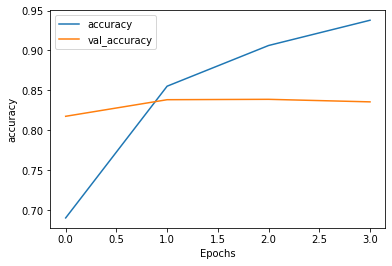

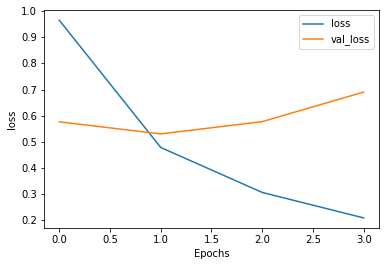

In [12]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")